# 0.&nbsp;Prepare

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Reading the dataset
df_ecom = pd.read_csv('https://raw.githubusercontent.com/kieuthutran/RFM-Analysis-for-Customer-Segmentation/refs/heads/main/ecommerce_retail.csv', encoding='latin-1')

# Displaying the data
df_ecom.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
df_ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


# 1.&nbsp;EDA

## 1.1. Datatype

In [ ]:
df_ecom.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,object
UnitPrice,float64
CustomerID,float64
Country,object


In [ ]:
# Convert 'InvoiceDate' to datetime
df_ecom['InvoiceDate'] = pd.to_datetime(df_ecom['InvoiceDate'], format='%d/%m/%Y %H:%M', errors='coerce')
# Convert 'CustomerID' to string (object)
df_ecom['CustomerID'] = df_ecom['CustomerID'].fillna(0).astype(int).astype(str)
df_ecom['CustomerID'] = df_ecom['CustomerID'].replace('0', np.nan)

df_ecom.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


## 1.2. Missing data

In [ ]:
df_ecom.isna().mean().sort_values()

,0
InvoiceNo,0.000000
StockCode,0.000000
Quantity,0.000000
InvoiceDate,0.000000
UnitPrice,0.000000
Country,0.000000
Description,0.002683
CustomerID,0.249267


The 'Description' is being kept as is, as it does not significantly affect RFM analysis.

In [ ]:
# Drop rows with missing 'CustomerID' values
df_ecom.dropna(subset=['CustomerID'], how = 'all' , inplace=True)

## 1.3. Duplicated data

In [ ]:
df_ecom.duplicated().sum()

5225

In [ ]:
df_ecom.drop_duplicates(inplace=True)
df_ecom.duplicated().sum()

0

## 1.4. Incorrect value

In [ ]:
display(df_ecom.describe())
display(df_ecom.describe(exclude="number"))

,Quantity,InvoiceDate,UnitPrice
count,401604.000000,401604,401604.000000
mean,12.183273,2011-07-10 12:08:23.848567552,3.474064
min,-80995.000000,2010-12-01 08:26:00,0.000000
25%,2.000000,2011-04-06 15:02:00,1.250000
50%,5.000000,2011-07-29 15:40:00,1.950000
75%,12.000000,2011-10-20 11:58:30,3.750000
max,80995.000000,2011-12-09 12:50:00,38970.000000
std,250.283037,NaN,69.764035


,InvoiceNo,StockCode,Description,InvoiceDate,CustomerID,Country
count,401604,401604,401604,401604,401604,401604
unique,22190,3684,3896,NaN,4372,37
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,17841,United Kingdom
freq,542,2065,2058,NaN,7812,356728
mean,NaN,NaN,NaN,2011-07-10 12:08:23.848567552,NaN,NaN
min,NaN,NaN,NaN,2010-12-01 08:26:00,NaN,NaN
25%,NaN,NaN,NaN,2011-04-06 15:02:00,NaN,NaN
50%,NaN,NaN,NaN,2011-07-29 15:40:00,NaN,NaN
75%,NaN,NaN,NaN,2011-10-20 11:58:30,NaN,NaN
max,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN


In [ ]:
# Convert negative values in 'Quantity' and 'UnitPrice' to positive
df_ecom['Quantity'] = df_ecom['Quantity'].abs()
df_ecom['UnitPrice'] = df_ecom['UnitPrice'].abs()

## 1.5. Filtering data

In [ ]:
df_ecom = df_ecom[~df_ecom['InvoiceNo'].astype(str).str.startswith('C')]
df_ecom = df_ecom[df_ecom['Quantity'] > 0]
df_ecom = df_ecom[df_ecom['UnitPrice'] > 0]

In [ ]:
# Filtering data to only include transactions from the United Kingdom to avoid data imbalance.
df_ecom = df_ecom[df_ecom['Country'] == 'United Kingdom']

# 2.&nbsp;RFM

## 2.1. R_score, F_score, M_score

In [ ]:
# Create dataframe User
df_user = pd.DataFrame(df_ecom['CustomerID'].unique())
df_user.rename(columns={0: 'CustomerID'}, inplace=True)

# Calculate Recency
df_recency = df_ecom.groupby('CustomerID')['InvoiceDate'].max().reset_index()
df_recency['Recency'] = df_recency['InvoiceDate'].apply(lambda x: (dt.date(2011, 12, 31) - x.date()).days)

df_user = df_user.merge(df_recency, on='CustomerID', how='left')
df_user.drop(columns='InvoiceDate', inplace=True)

# Calculate Frequency
df_frequency = df_ecom.groupby('CustomerID')['InvoiceNo'].count().reset_index()

df_user = df_user.merge(df_frequency, on='CustomerID', how='left')
df_user.rename(columns={'InvoiceNo': 'Frequency'}, inplace=True)

# Calculate Monetary
df_ecom['TotalPay'] = df_ecom['Quantity'] * df_ecom['UnitPrice']
df_monetary = df_ecom.groupby('CustomerID')['TotalPay'].sum().reset_index()

df_user = df_user.merge(df_monetary, on='CustomerID', how='left')
df_user.rename(columns={'TotalPay': 'Monetary'}, inplace=True)

## 2.2. RFM_score

In [ ]:
# Calculate quintiles for each RFM metric
df_user['R_Score'] = pd.qcut(df_user['Recency'], q=5, labels=[5,4,3,2,1])
df_user['F_Score'] = pd.qcut(df_user['Frequency'], q=5, labels= [1,2,3,4,5])
df_user['M_Score'] = pd.qcut(df_user['Monetary'], q=5, labels= [1,2,3,4,5])

# Combine RFM scores into a single RFM_Score
df_user['RFM_Score'] = df_user['R_Score'].astype(str) + df_user['F_Score'].astype(str) + df_user['M_Score'].astype(str)

df_user.head()

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,17850,394,297,5391.21,1,5,5,155
1,13047,53,172,3237.54,4,5,5,455
2,13748,117,28,948.25,2,2,4,224
3,15100,355,3,876.00,1,1,3,113
4,15291,47,103,4668.30,4,4,5,445


## 2.3. Segment

In [ ]:
# Create segmentation function
def map_segment(score):
    if score in [555, 554, 544, 545, 454, 455, 445]:
        segment = 'Champions'
    elif score in [543, 444, 435, 355, 354, 345, 344, 335]:
        segment = 'Loyal'
    elif score in [553, 551, 552, 541, 542, 533, 532, 531, 452, 451, 442, 441, 431, 453, 433, 432, 423, 353, 352, 351, 342, 341, 333, 323]:
        segment = 'Potential Loyalist'
    elif score in [512, 511, 422, 421, 412, 411, 311]:
        segment = 'New Customers'
    elif score in [525, 524, 523, 522, 521, 515, 514, 513, 425,424, 413,414,415, 315, 314, 313]:
        segment = 'Promising'
    elif score in [535, 534, 443, 434, 343, 334, 325, 324]:
        segment = 'Need Attention'
    elif score in [331, 321, 312, 221, 213, 231, 241, 251]:
        segment = 'About To Sleep'
    elif score in [255, 254, 245, 244, 253, 252, 243, 242, 235, 234, 225, 224, 153, 152, 145, 143, 142, 135, 134, 133, 125, 124]:
        segment = 'At Risk'
    elif score in [155, 154, 144, 214,215,115, 114, 113]:
        segment = 'Cannot Lose Them'
    elif score in [332, 322, 233, 232, 223, 222, 132, 123, 122, 212, 211]:
        segment = 'Hibernating Customers'
    else:
        segment = 'Lost customers'
    return segment

# Apply the segmentation function to create 'Segment' column
df_user['Segment'] = df_user['RFM_Score'].map(map_segment)
df_user.head()

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment
0,17850,394,297,5391.21,1,5,5,155,Lost customers
1,13047,53,172,3237.54,4,5,5,455,Lost customers
2,13748,117,28,948.25,2,2,4,224,Lost customers
3,15100,355,3,876.00,1,1,3,113,Lost customers
4,15291,47,103,4668.30,4,4,5,445,Lost customers


In [ ]:
df_user.duplicated().sum()

0

# 3.&nbsp;Visualization

## 3.1. Distribution of Recency, Frequency, Monetary

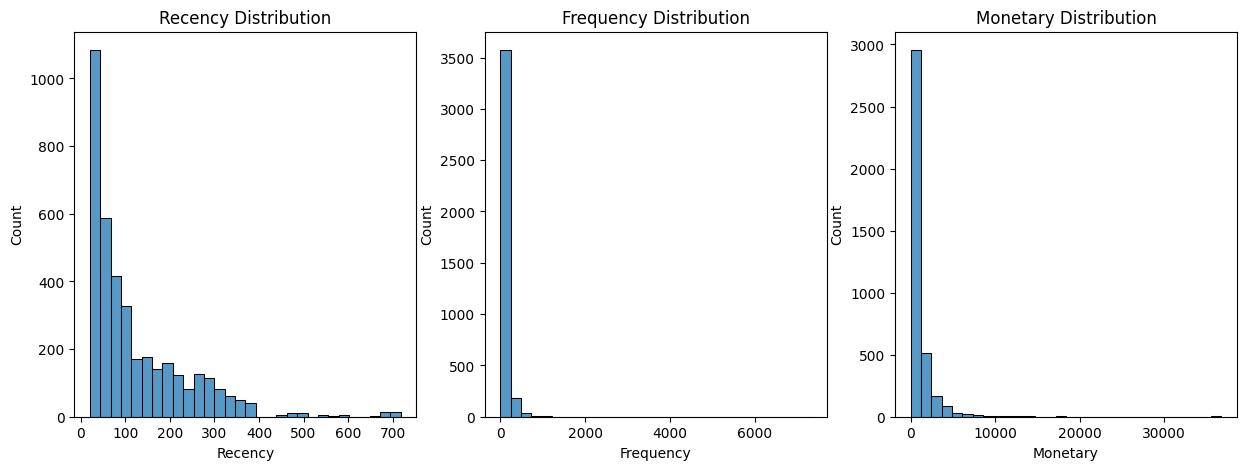

In [ ]:
fig, ax = plt.subplots(figsize=(15,5), ncols=3)
sns.histplot(data=df_user, x='Recency', bins=30, ax=ax[0])
sns.histplot(data=df_user, x='Frequency', bins=30, ax=ax[1])
sns.histplot(data=df_user, x='Monetary', bins=30, ax=ax[2])
ax[0].set_title('Recency Distribution')
ax[1].set_title('Frequency Distribution')
ax[2].set_title('Monetary Distribution')
plt.show()

**Recency**:

* The peak of the distribution is around 0-100 days, indicating that many customers have made recent purchases within this timeframe.
* The long tail suggests that there is a segment of customers who have not purchased for a longer period. These customers might be at risk of churn.

**Frequency**:

* The peak of the distribution is around 0-250 purchases, indicating that most customers make a few purchases.
* The long tail suggests that there is a segment of high-value customers who make frequent purchases. These customers could be valuable for loyalty programs and personalized offers.

**Monetary**:

* The peak of the distribution is around 0-5000, indicating that most customers make smaller purchases.
* The long tail suggests that there is a segment of high-spending customers who make larger purchases. These customers could be targeted for premium products or exclusive offers.

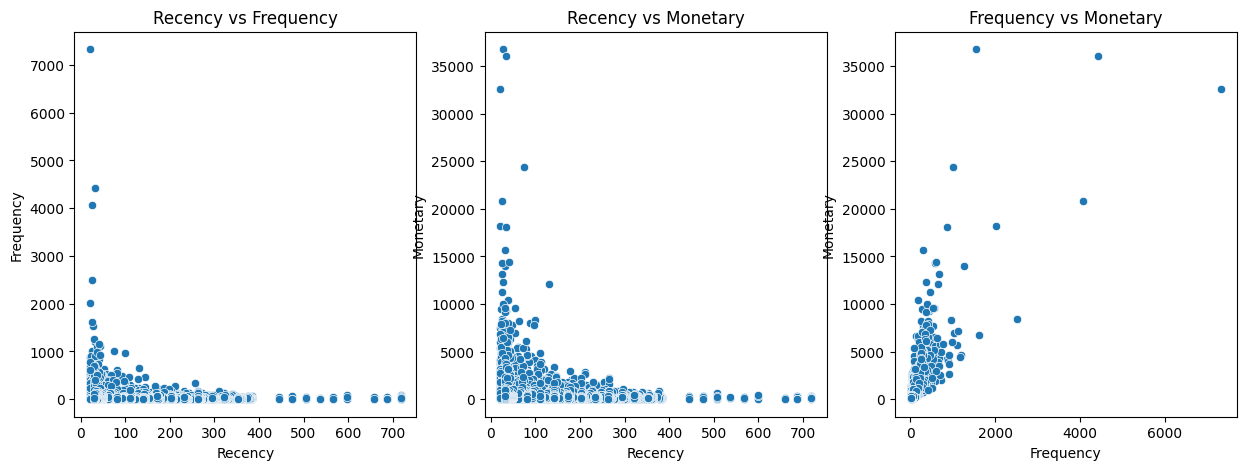

In [ ]:
fig, ax = plt.subplots(figsize=(15,5), ncols=3)
sns.scatterplot(df_user, x='Recency', y='Frequency', ax=ax[0])
sns.scatterplot(df_user, x='Recency', y='Monetary', ax=ax[1])
sns.scatterplot(df_user, x='Frequency', y='Monetary', ax=ax[2])
ax[0].set_title('Recency vs Frequency')
ax[1].set_title('Recency vs Monetary')
ax[2].set_title('Frequency vs Monetary')
plt.show()

**Recency vs. Frequency**:

* The majority of customers who have made recent purchases (lower Recency values) tend to have lower purchase frequencies.
* A few customers with higher Recency values (longer time since last purchase) also have high purchase frequencies, suggesting that they might be occasional high-value customers.

**Recency vs. Monetary**:

* The majority of customers who have made recent purchases (lower Recency values) tend to have lower average purchase amounts.
* A few customers with higher Recency values (longer time since last purchase) also have high average purchase amounts, suggesting that they might be occasional high-spending customers.

**Frequency vs. Monetary**:

* The majority of customers with lower purchase frequencies tend to have lower average purchase amounts.
* As purchase frequency increases, the average purchase amount also tends to increase, indicating a _positive relationship_ between the two.

## 3.2. Distribution of Segment

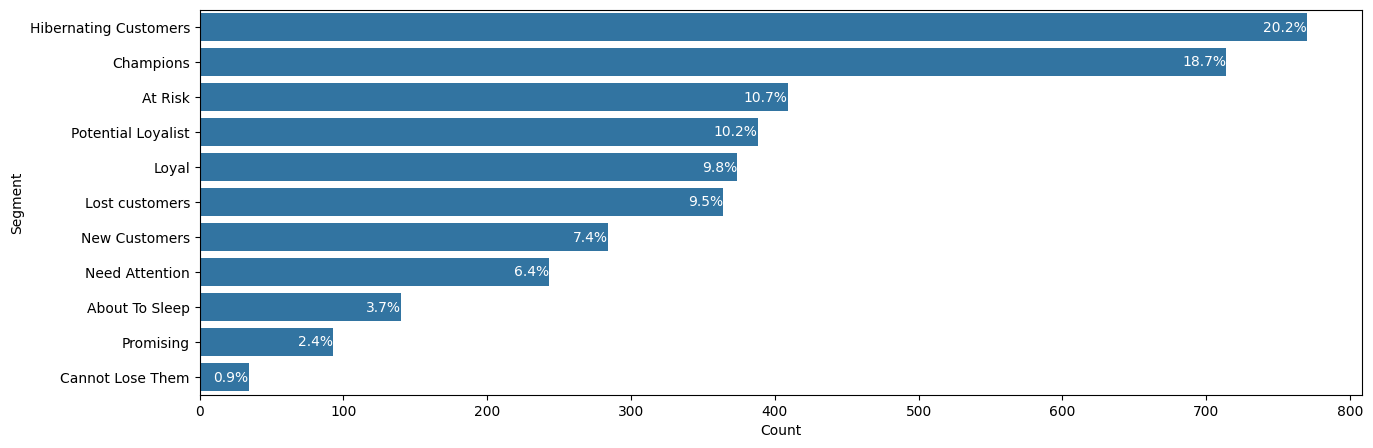

In [ ]:
segment_counts = df_user['Segment'].value_counts().reset_index()
segment_counts.columns = ['Segment', 'Count']

plt.figure(figsize=(15,5))
ax = sns.barplot(segment_counts, x='Count', y='Segment', errorbar=None)
total = segment_counts['Count'].sum()
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width() / total)
    x = p.get_x() + p.get_width()
    y = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x, y), ha='right', va='center', color='white')
plt.show()

The most prominent segments are _"Hibernating Customers"_ and _"Champions"_, while _"Cannot Lose Them"_ is the smallest segment.

# 4.&nbsp;Recommendation

|Segment | Characteristics| Recommendations|
|--|--|--|
|Hibernating Customers | Haven't made a purchase recently but have a history of activity| Focus on reactivation strategies to re-engage these customers|
|Champions | High purchase frequency and spend, and it's crucial to retain them| Implement loyalty programs, personalized offers, and excellent customer service to keep them satisfied.
|At Risk | Risk of churning. They may have decreased purchase frequency or spend| Implement targeted marketing campaigns, personalized offers, or customer support to retain these customers|
|Potential Loyalists | Have a history of purchases but haven't reached the level of Champions yet| Focus on increasing their engagement and loyalty through loyalty programs, personalized recommendations, and special offers|
|Loyal Customers | Make regular purchases| Personalized offers, exclusive access to new products, or early access to sales|
|Lost Customers | Haven't made a purchase for a long time| Analyze the reasons for their inactivity and implement targeted win-back campaigns.|
|New Customers | Recently made their first purchase| Providing a positive customer experience to encourage repeat purchases|
|Need Attention | Further analysis to understand their behavior and needs| Segment them further based on other factors like purchase history or demographics|
|About To Sleep | Similar to At Risk, but they may be further along the path to churn| Motivate them to make another purchase by offering discounts|
|Promising | Made a few purchases and have the potential to become loyal customers| Implement targeted marketing campaigns to encourage repeat purchases|
|Cannot Lose Them | Small but crucial group of high-value customers| Prioritize their retention and satisfaction with personalized offers, exclusive benefits, and exceptional customer service|